**1. Importing the dependencies**

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

**2. Data Loading and Understanding**

In [85]:
# read the csv data to a pandas dataframe
df = pd.read_csv('/content/train.csv')

In [86]:
# Fix column name typos first
df.rename(columns={
    'austim': 'autism',
    'contry_of_res': 'country_of_res'
}, inplace=True)

# List of categorical columns to encode
categorical_cols = ['gender', 'ethnicity', 'jaundice', 'autism',
                    'country_of_res', 'used_app_before', 'age_desc', 'relation']



initial inspection

In [87]:
df.shape

(800, 22)

In [88]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [89]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [90]:
# display all columns of dataframe
pd.set_option('display.max_columns', None)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  autism           800 non-null    object 
 16  country_of_res   800 non-null    object 
 17  used_app_before 

In [92]:
# convert age column datatype to integer
df["age"] = df["age"].astype(int)

In [93]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [94]:
for col in df.columns:
  numerical_features=["ID","age","result"]
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
autism

In [95]:
# dropping ID and age_desc column
df = df.drop(columns = ['ID','age_desc'])

In [96]:
df.shape

(800, 20)

In [97]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [98]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [99]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [100]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# replace value in the country column
df["country_of_res"] = df["country_of_res"].replace(mapping)

In [101]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [102]:
# Target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights:**
1. missing values in ethnicity and relation
2. age_desc column has only 1 unique value so it is removed as it is not important for prediction
3. fixed country names
4. identified class imbalance in the target column

**3. Exploratory Data Analysis(EDA)**

In [103]:
df.shape

(800, 20)

In [104]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [105]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [106]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical Columns:
- age
- result



In [107]:
# set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

Mean of age: 27.96375
Median of age: 24.0


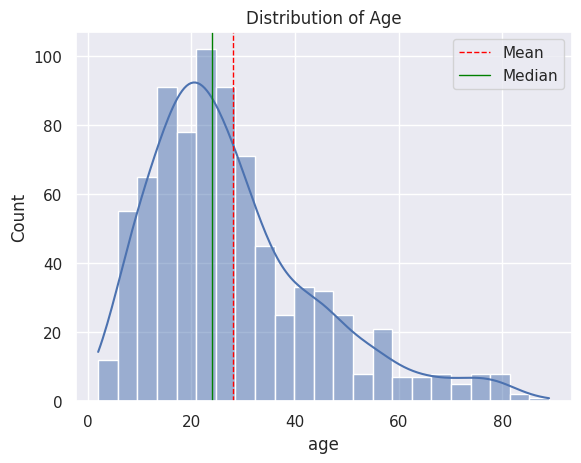

In [108]:
#Histogram for "age"
sns.histplot  (df['age'], kde=True)
plt.title('Distribution of Age')

# calculate mean and median
age_mean = df['age'].mean()
age_median = df['age'].median()

print("Mean of age:", age_mean)
print("Median of age:", age_median)

# add vertical lines for mean and median
plt.axvline(age_mean, color='red', linestyle='--', linewidth=1, label='Mean')
plt.axvline(age_median, color='green', linestyle='-', linewidth=1, label='Median')

plt.legend()
plt.show()

Mean : 8.537303106501248
Median : 9.605299308


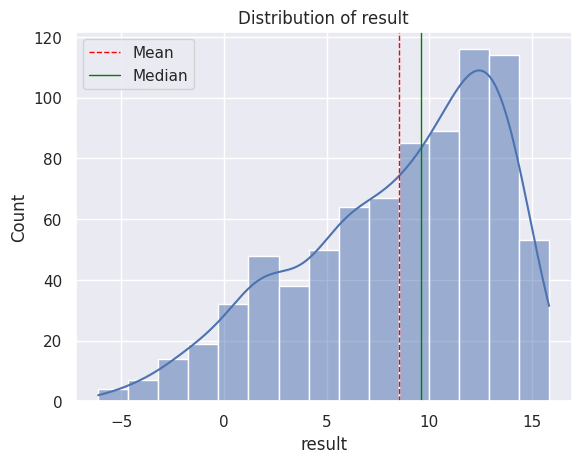

In [109]:
#Histogram for "result"
sns.histplot  (df['result'], kde=True)
plt.title('Distribution of result')

# calculate mean and median
result_mean = df['result'].mean()
result_median = df['result'].median()

print("Mean :", result_mean)
print("Median :", result_median)

# add vertical lines for mean and median
plt.axvline(result_mean, color='red', linestyle='--', linewidth=1, label='Mean')
plt.axvline(result_median, color='green', linestyle='-', linewidth=1, label='Median')

plt.legend()
plt.show()

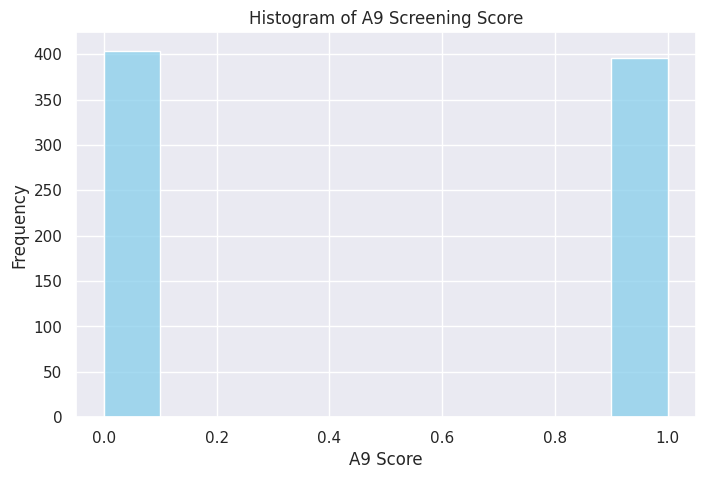

In [110]:
plt.figure(figsize=(8,5))
# Corrected column name from 'A9' to 'A9_Score'
sns.histplot(df['A9_Score'], bins=10, kde=False, color='skyblue')

plt.title('Histogram of A9 Screening Score')
plt.xlabel('A9 Score')
plt.ylabel('Frequency')
plt.show()

**Box Plots for identifying outliers in the numerical columns**

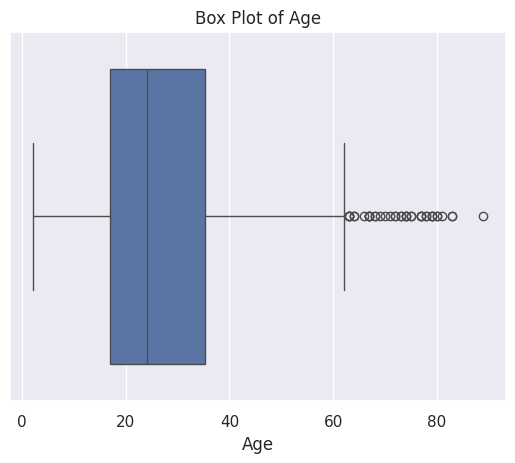

In [111]:
# box plot
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

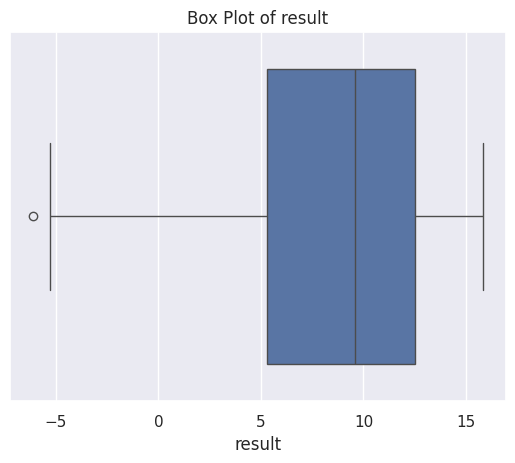

In [112]:
# box plot
sns.boxplot(x=df['result'])
plt.title('Box Plot of result')
plt.xlabel('result')
plt.show()

In [113]:
# count the outliers using IQI method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df['age'] < lower_bound) | (df['age'] > Upper_bound)]

In [114]:
len(age_outliers)

39

In [115]:
# count the outliers using IQI method
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df['result'] < lower_bound) | (df['result'] > Upper_bound)]

In [116]:
len(result_outliers)

1

/tmp/ipython-input-3753865110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class/ASD', y='age', data=df, palette='pastel')


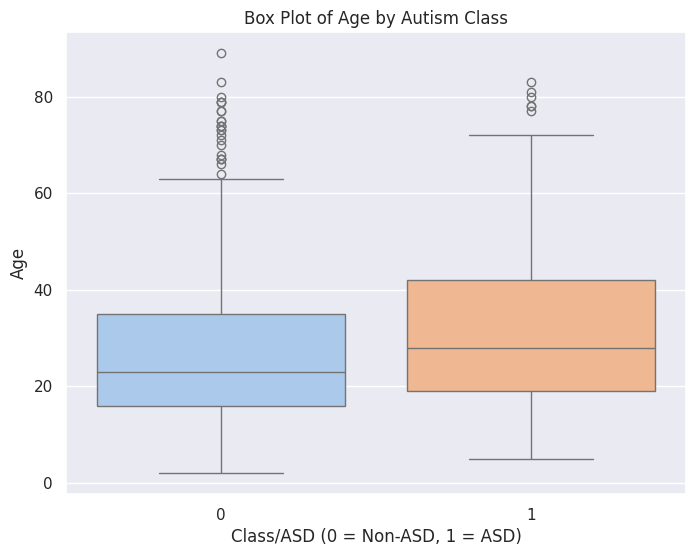

In [117]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class/ASD', y='age', data=df, palette='pastel')

plt.title('Box Plot of Age by Autism Class')
plt.xlabel('Class/ASD (0 = Non-ASD, 1 = ASD)')
plt.ylabel('Age')

plt.show()

/tmp/ipython-input-1070362072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class/ASD', y='A9_Score', data=df, palette='coolwarm')


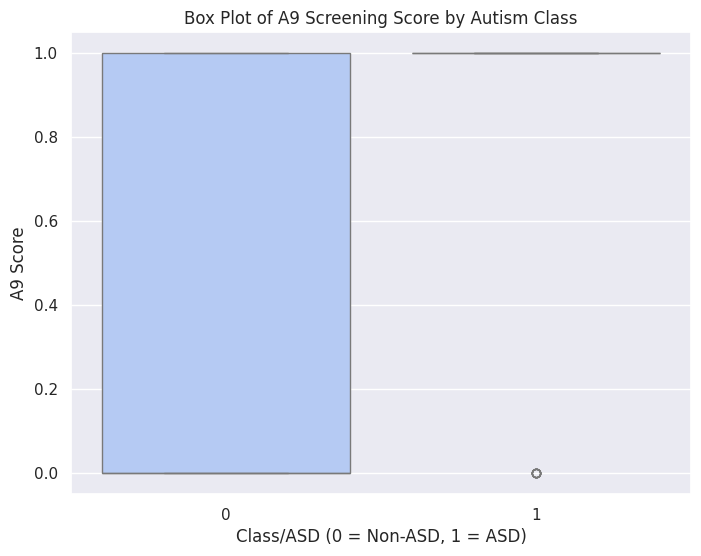

In [118]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class/ASD', y='A9_Score', data=df, palette='coolwarm')

plt.title('Box Plot of A9 Screening Score by Autism Class')
plt.xlabel('Class/ASD (0 = Non-ASD, 1 = ASD)')
plt.ylabel('A9 Score')

plt.show()

Univariate Analysis of Categorical Columns

In [119]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

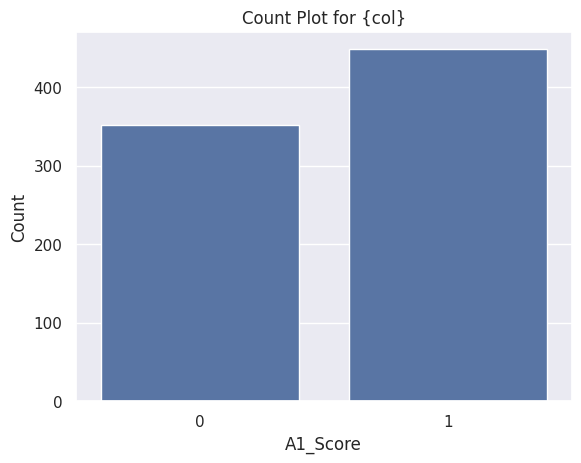

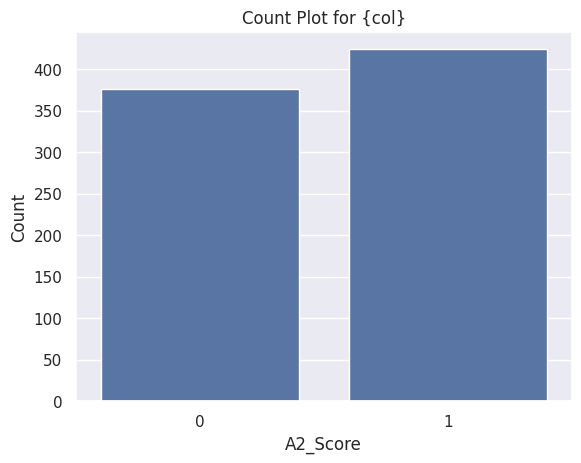

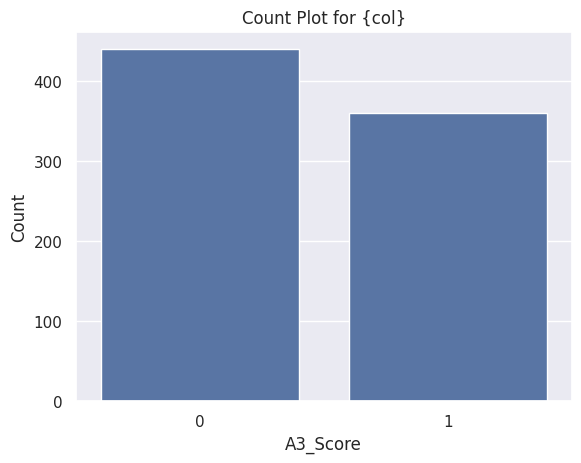

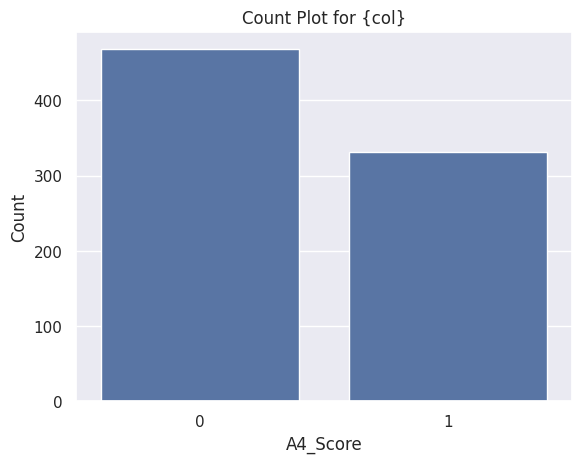

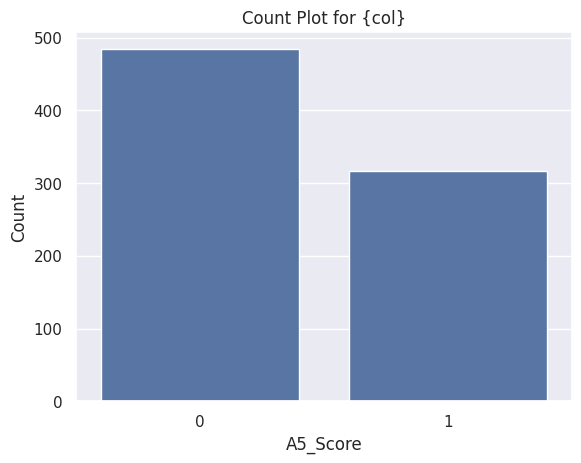

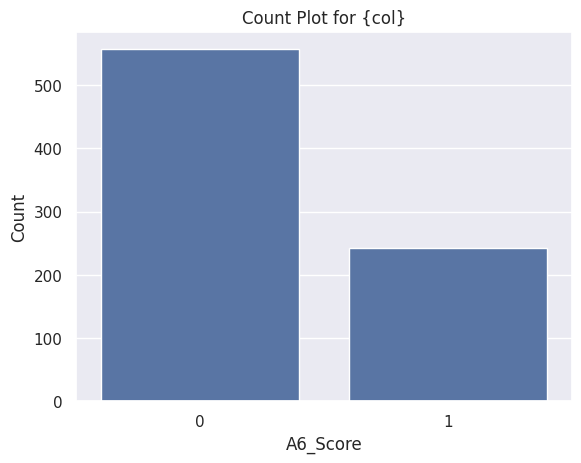

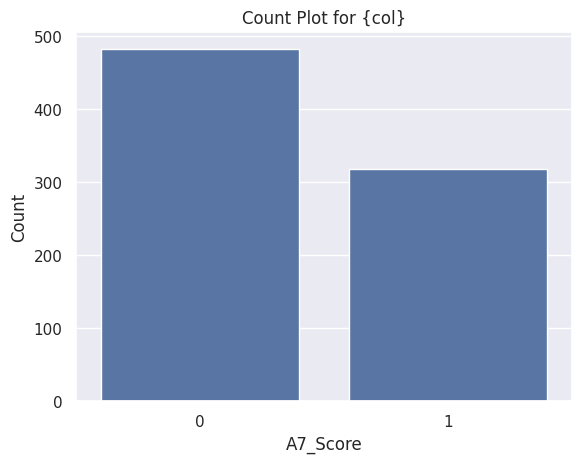

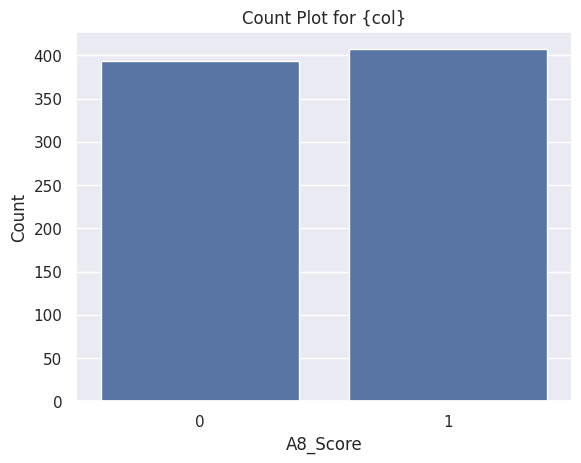

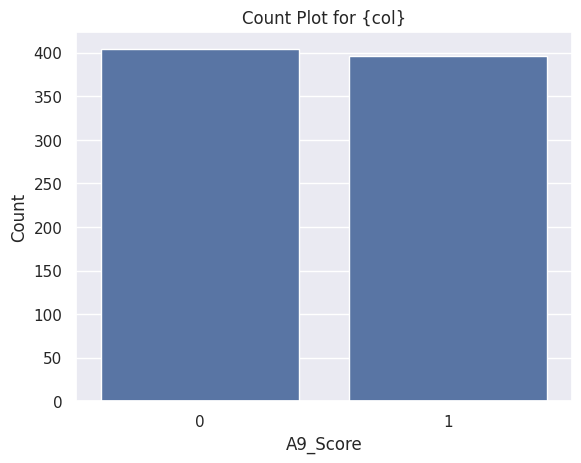

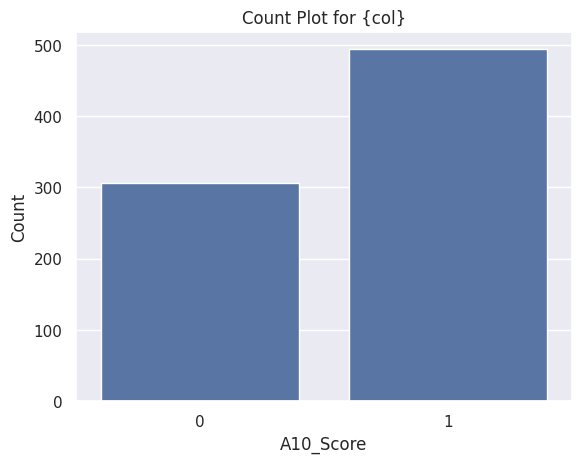

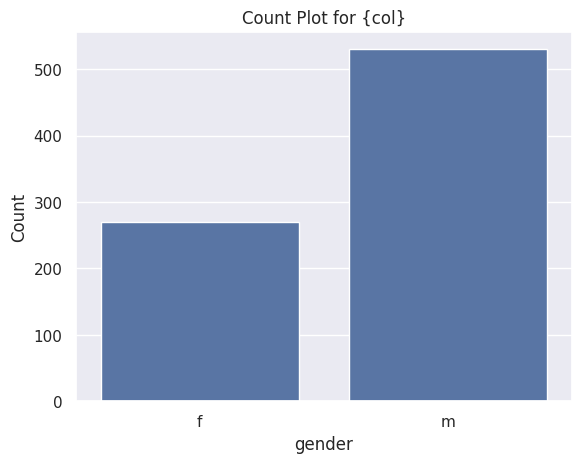

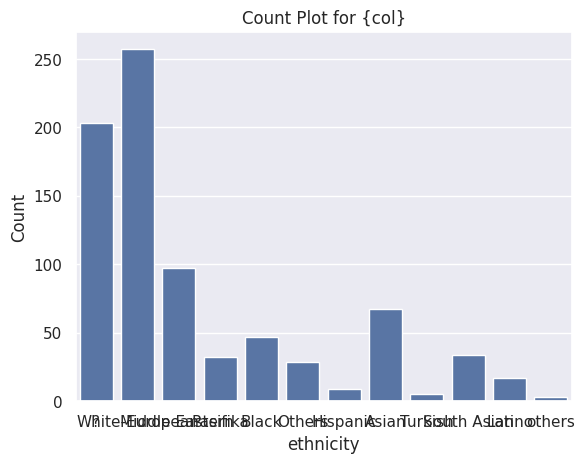

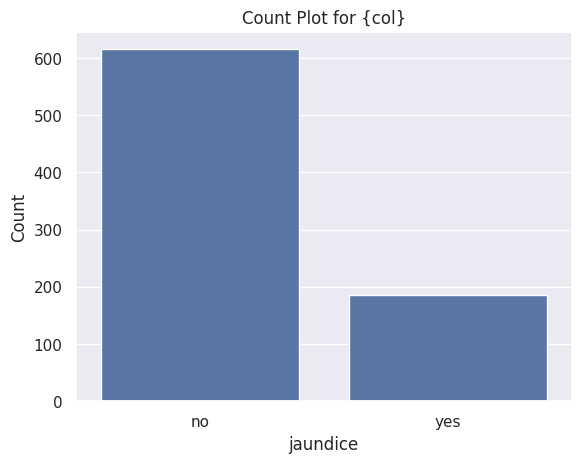

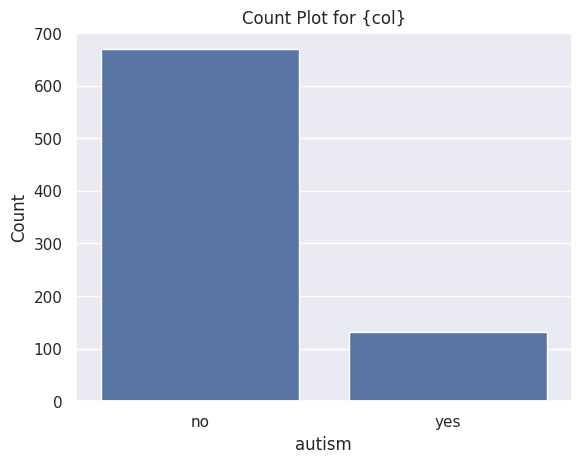

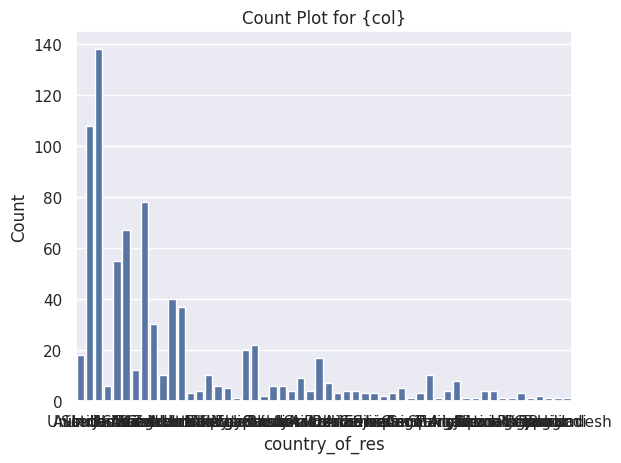

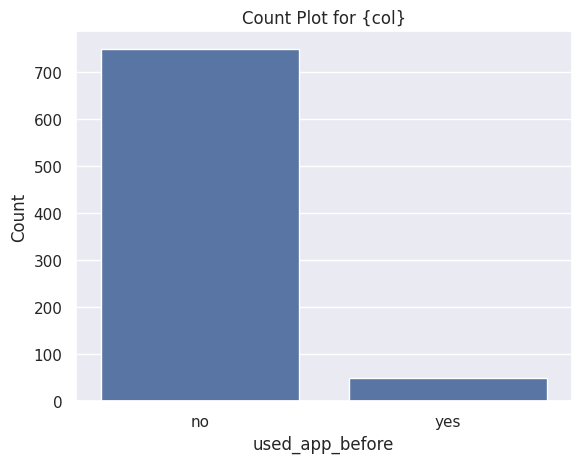

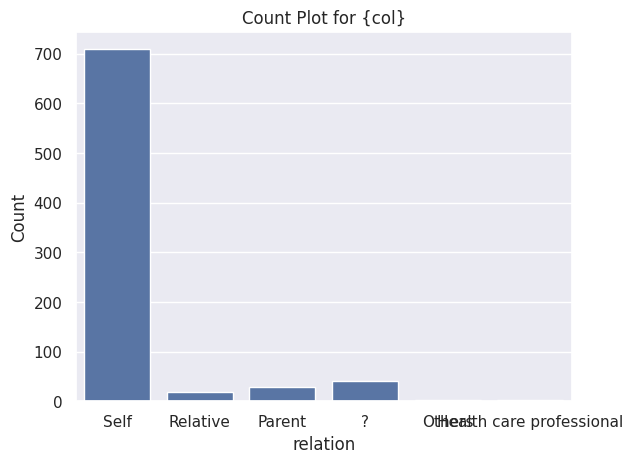

In [120]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
        'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title("Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

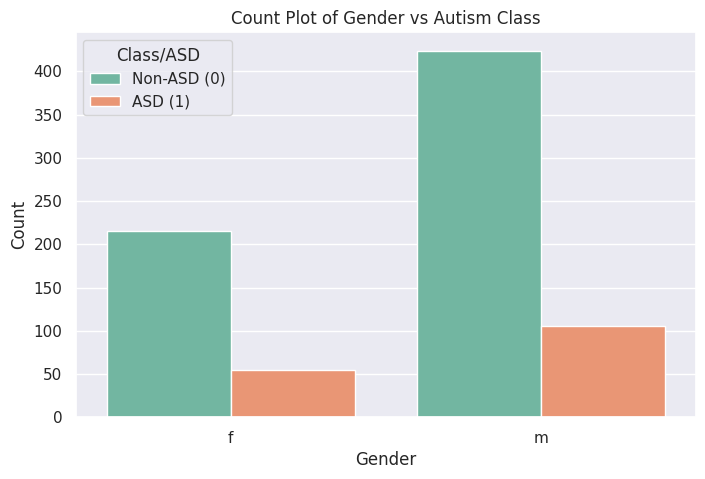

In [121]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='gender', hue='Class/ASD', palette='Set2')

plt.title('Count Plot of Gender vs Autism Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Class/ASD', labels=['Non-ASD (0)', 'ASD (1)'])
plt.show()

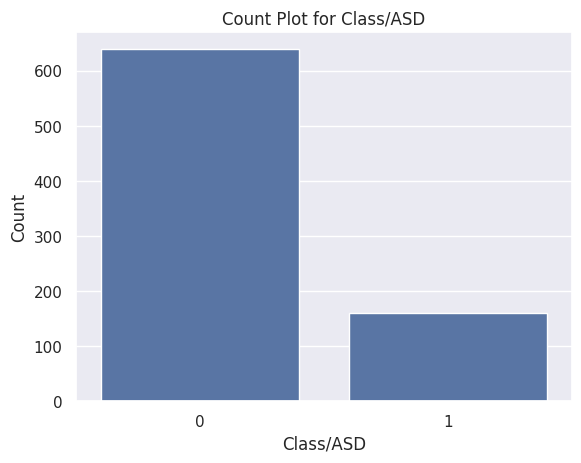

In [122]:
# countplot for target column(Class/ASD)
sns.countplot(x=df['Class/ASD'])
plt.title("Count Plot for Class/ASD")
plt.xlabel('Class/ASD')
plt.ylabel("Count")
plt.show()

In [123]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


Handle missing values in ethnicity and relation column

In [124]:
 df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [125]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [126]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [127]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative":"Others",
     "Parent":"Others",
     "Health care professional":"Others"})

In [128]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [129]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

In [130]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=['object']).columns

In [131]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [132]:
from sklearn.preprocessing import LabelEncoder

object_columns = ['gender', 'ethnicity', 'jaundice', 'autism',
                  'country_of_res', 'used_app_before', 'relation']

label_encoders = {}

# Check unique values before encoding
for col in object_columns:
    print(f"Unique values in {col} before encoding: {df[col].unique()}")

for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


Unique values in gender before encoding: ['f' 'm']
Unique values in ethnicity before encoding: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']
Unique values in jaundice before encoding: ['no' 'yes']
Unique values in autism before encoding: ['no' 'yes']
Unique values in country_of_res before encoding: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Vietnam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy' 'Bahamas'
 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka' 'Russia' 'Bolivia'
 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden' 'Iceland' 'China'
 'Angola' 'Germany' 'Spain' 'Tonga' 'Pakistan' 'Iran' 'Argentina' 'Japan'
 'Mexico' 'Nicaragua' 'Sierra Leone' 'Czech Republic' 'Niger' 'Romania'
 'Cyprus' 'Belgium' 'Burundi' 'Bangladesh']
Unique values in used_app_before be

In [133]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


Bivariate Analysis

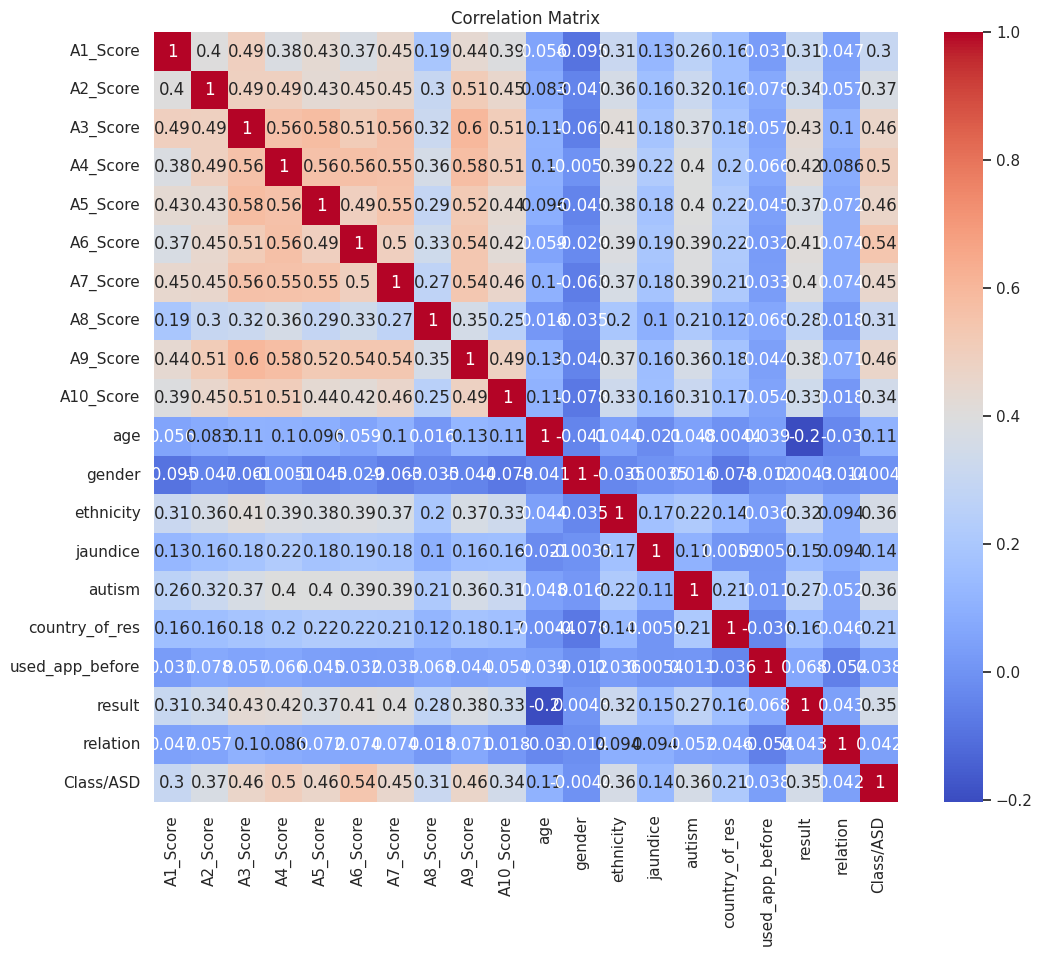

In [134]:
# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Insights from EDA**

- There are few outliers in the numerical columns(age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We do not have any highly correlated column
- Performed label encoding and saved the encoders

**4. Data Preprocessing**

Handling the Outliers

In [135]:
# function to replace the utliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    #replace outliers with median value
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > Upper_bound else x)

    return df

In [136]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [137]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [138]:
df.shape

(800, 20)

**Train Test Split**

In [139]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [140]:
X = df.drop(columns = ["Class/ASD"])
y = df["Class/ASD"]

In [141]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  auti

In [142]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [144]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [145]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [146]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


**SMOTE (Synthetic Minority Oversampling Technique)**

In [147]:
smote = SMOTE(random_state=42)


In [148]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [149]:
print(y_train_smote.shape)

(1030,)


In [150]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


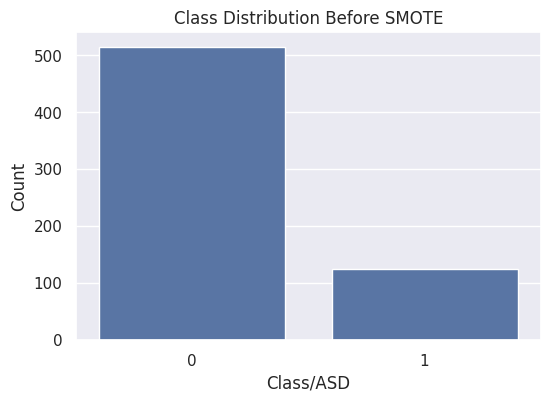

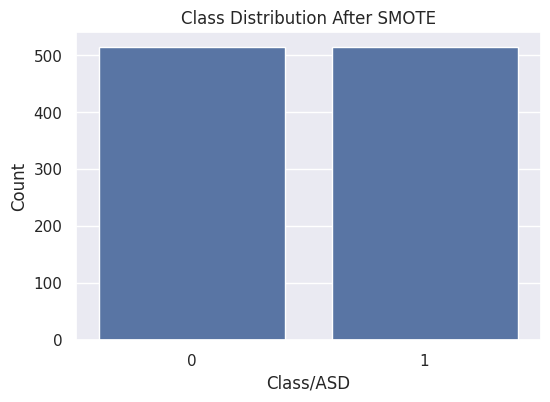

In [151]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()


**5. Model Training**

In [152]:
# list of classifiers
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state = 42),
    "Random Forest" : RandomForestClassifier(random_state = 42),
    "XGBoost" : XGBClassifier(random_state = 42)
}

In [153]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}


In [154]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv = 5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)


Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [155]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

**6. Model Selection & Hyperparameter Tuning**

In [156]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state = 42)
random_forest = RandomForestClassifier(random_state = 42)
xgboost_classifier = XGBClassifier(random_state = 42)

In [157]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy", "log_loss"],  # Added "log_loss" for better classification
    "max_depth": [None, 10, 20, 30, 50, 70, 100],  # Broadened depth for flexibility
    "min_samples_split": [2, 5, 10, 20],  # Higher values for deeper pruning
    "min_samples_leaf": [1, 2, 4, 8, 16],  # Larger leaf size to handle overfitting
    "max_features": ["sqrt", "log2", None]  # Included max features to optimize splits
}

param_grid_rf = {
    "n_estimators": [100, 200, 300, 500, 1000],  # Increased tree count for better aggregation
    "max_depth": [None, 10, 20, 30, 50],  # Extended depth for capturing complex patterns
    "min_samples_split": [2, 5, 10, 20],  # Enhanced control over splits
    "min_samples_leaf": [1, 2, 4, 8],  # Larger minimum leaf size
    "bootstrap": [True, False],  # Preserve both bootstrapped and full data usage
    "max_features": ["sqrt", "log2", None],  # Optimization via feature subset selection
    "oob_score": [True, False]  # Added out-of-bag estimation to assess accuracy
}

param_grid_xgb = {
    "n_estimators": [100, 200, 300, 500, 1000],  # Increased estimator count for stability
    "max_depth": [3, 5, 6, 7, 8, 10, 12],  # Expanded depth range
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2, 0.3],  # Smaller steps for finer adjustments
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Better subsampling diversity
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Improved tree-level column selection
    "gamma": [0, 0.1, 0.3, 0.5, 1, 2],  # Regularization to reduce complexity
    "reg_alpha": [0, 0.01, 0.1, 0.5, 1],  # L1 regularization for sparsity
    "reg_lambda": [0.5, 1, 1.5, 2],  # L2 regularization for stability
    "scale_pos_weight": [1, 2, 5, 10]  # Improved handling of class imbalance
}


In [158]:
# hyperparameter tuning for 3 tree based models

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator = decision_tree, param_distributions = param_grid_dt, n_iter = 20, cv = 5, scoring = "accuracy", random_state = 42)
random_search_rf = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid_rf, n_iter = 20, cv = 5, scoring = "accuracy", random_state = 42)
random_search_xgb = RandomizedSearchCV(estimator = xgboost_classifier, param_distributions = param_grid_xgb, n_iter = 20, cv = 5, scoring = "accuracy", random_state = 42)


In [159]:
# fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 448, in fit
    raise ValueError("Out of bag

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5, 1, 2],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2, 0.3],
                                        'max_depth': [3, 5, 6, 7, 8, 10, 12],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000],
                                        'reg_alpha': [0, 0.01, 0.1, 0.5, 1],
                                        'reg_lambda': [0.5, 1, 1.5, 2],
                                        'scale_pos_weight': [1, 2, 5, 10],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, scoring='accuracy')

In [160]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)


DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
0.8601941747572814
RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=10,
                       n_estimators=300, random_state=42)
0.9145631067961165


In [161]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
   best_model = random_search_dt.best_estimator_
   best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
   best_model = random_search_rf.best_estimator_
   best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
   best_model = random_search_xgb.best_estimator_
   best_score = random_search_xgb.best_score_

In [162]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=10,
                       n_estimators=300, random_state=42)
Best Cross-Validation Accuracy: 0.91


In [163]:
# save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [164]:
# evaluate on test data
y_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy score:
 0.84375
Confusion matrix:
 [[109  15]
 [ 10  26]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       124
           1       0.63      0.72      0.68        36

    accuracy                           0.84       160
   macro avg       0.78      0.80      0.79       160
weighted avg       0.85      0.84      0.85       160



In [165]:
import pickle

with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

with open('label_encoders.pkl', 'rb') as encoder_file:
    label_encoders = pickle.load(encoder_file)

print("Files loaded successfully!")


Files loaded successfully!


In [166]:
def predict_asd(input_data):
    # Preprocess input data
    input_df = pd.DataFrame([input_data])  # Create a DataFrame from input

    # Apply label encoding
    for column, encoder in label_encoders.items():
        if column in input_df.columns:
            # Check if the value exists in the encoder classes, handle unseen values
            try:
                input_df[column] = encoder.transform(input_df[column])
            except ValueError:
                print(f"Warning: Unseen value in column {column}. Default encoding applied.")
                input_df[column] = encoder.transform([encoder.classes_[0]])  # Default to first class

    # Handle missing columns (if any) in the input data
    for col in best_model.feature_names_in_:
        if col not in input_df.columns:
            input_df[col] = 0  # or some other default value
    input_df = input_df[best_model.feature_names_in_]  # Ensure correct column order

    # Make prediction
    prediction = best_model.predict(input_df)[0]
    return prediction

# Example input
example_input = {
    'A1_Score': 1,
    'A2_Score': 1,
    'A3_Score': 1,
    'A4_Score': 1,
    'A5_Score': 1,
    'A6_Score': 1,
    'A7_Score': 1,
    'A8_Score': 1,
    'A9_Score': 1,
    'A10_Score': 1,
    'age': 24,
    'gender': 'm',
    'ethnicity': 'White-European',
    'jaundice': 'no',
    'autism': 'no',
    'country_of_res': 'United States',
    'used_app_before': 'yes',
    'result': 9,
    'relation': 'Self'
}

# Get the prediction
prediction = predict_asd(example_input)
print(f"Prediction: {prediction}")


Prediction: 1
